In [1]:
import os
import seaborn
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt


In [2]:
from matplotlib.ticker import FormatStrFormatter
majorFormatter = FormatStrFormatter('%0.1f')
import string
from matplotlib import rc
import regex as re

In [3]:
from matplotlib.backends.backend_pgf import FigureCanvasPgf
matplotlib.backend_bases.register_backend('pdf', FigureCanvasPgf)## TeX preamble
preamble = [
    r'\usepackage{fontspec}',
    r'\fontspec{Arial}',
    r'\usepackage{color}',
    r'\usepackage{soul}',
    r'\usepackage{amsmath}',
    r'\usepackage{fixltx2e}',
    r'\setulcolor{blue}',
    r'\usepackage{xcolor}',
    #r'\setul{0.5ex}{0.3ex}'
    r'\definecolor{darkcyan}{rgb}{0.0, 0.55, 0.55}',
    r'\definecolor{lightmagenta}{HTML}{EF56DF}',
]

pgf_with_latex = {
    "text.usetex": True,            # use LaTeX to write all text
    "pgf.rcfonts": False,           # Ignore Matplotlibrc
    "pgf.preamble": preamble
}
matplotlib.rcParams.update(pgf_with_latex)

In [4]:

flierprops = dict(marker='o', markerfacecolor='white', markeredgecolor='black',
                  markeredgewidth=0.5, markersize=3,
                  linestyle='none')

In [5]:
import seaborn as sns
def set_style():
    # This sets reasonable defaults for font size for
    # a figure that will go in a paper
    #sns.set_context("paper")
    
    # Set the font to be serif, rather than sans
    #sns.set(font='serif')
    
    # Make the background white, and specify the
    # specific font family
    sns.set_style("white", {"ytick.major.size":"5",
                            "xtick.major.size":"5",
                            "font.family": [u'Arial']} )#, rc={'text.usetex': True} )
    sns.set_context('paper', font_scale=1.25)

titanic = sns.load_dataset("titanic")
tips = sns.load_dataset("tips")
iris = sns.load_dataset("iris")


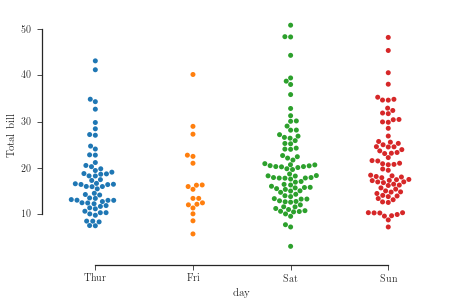

In [9]:
set_style()
fig_swarmplt = sns.swarmplot(x="day", y="total_bill", data=tips);
fig_swarmplt.set_ylabel("Total bill")
sns.despine(trim=True, offset=5)
fig_swarmplt.figure.tight_layout()

converting pdf to png - high resolution ...
trimming whitespace...
adding small border ...


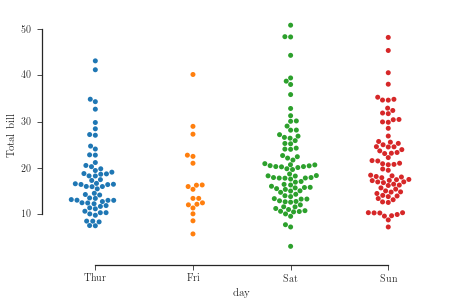

In [10]:

#dist_plt_relKa.figure.savefig("./figures/relKa_unmethylated_train.eps", format='eps', dpi=600)
#dist_plt_relKa.figure.savefig("./figures/relKa_unmethylated_train.pdf")
fig_swarmplt.figure.savefig("./figures/swmplt.pdf")
print("converting pdf to png - high resolution ...")
command_str = " ".join(["pdftoppm",  "./figures/swmplt.pdf", "out", "-png", "-f 1", "-r", str(300)])
os.system(command_str)
print("trimming whitespace...")
command_str = " ".join(["convert", "out-1.png", "-trim", "out-trimmed.png"])
os.system(command_str)
print("adding small border ...")
command_str = " ".join(["convert", "-bordercolor", "white",
                        "-border", str(10),
                        "out-trimmed.png", "./figures/swmplt.png"])
os.system(command_str)
fig_swarmplt.figure
